# Mô hình hồi quy tuyến tính

In [ ]:
# @title Thêm một số thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np


In [ ]:
# Đọc bộ dữ liệu đã được qua khâu tiền xử lý
df = pd.read_csv('output.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Mã hóa các trường hạng mục về dạng số
le = LabelEncoder()
categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [ ]:
# @title Chuẩn hóa dữ liệu
le = StandardScaler()

# df['budget'] = np.log(df['budget'] + 1)

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'budget', 'score', 'year', 'votes']

for feature in categorical_features:
    df[feature] = le.fit_transform(np.reshape(df[feature], (-1, 1)))


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
features = df[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
# features = df[['budget']]
target = df['gross']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.2)

In [ ]:
# Thực hiện giảm số chiều thông qua PCA
#pca = PCA(n_components=8) # Chỉ dữ lại 8 chiều
#X_train= pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
X_train = X_train
X_test = X_test

In [ ]:
# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Xem xét độ chính xác của kết quả dự đoán trên tập huấn luyện và thử nghiệm
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Final Training Accuracy: 65.60%
Final Test Accuracy: 66.43%
Train MAPE: 36.05%
Test MAPE: 6.41%
Train MAE: 57440071.93
Test MAE: 59979296.44
Train MSE: 11128073379566880.00
Test MSE: 15402807941315068.00
Train RMSE: 105489683.76
Test RMSE: 124108049.46


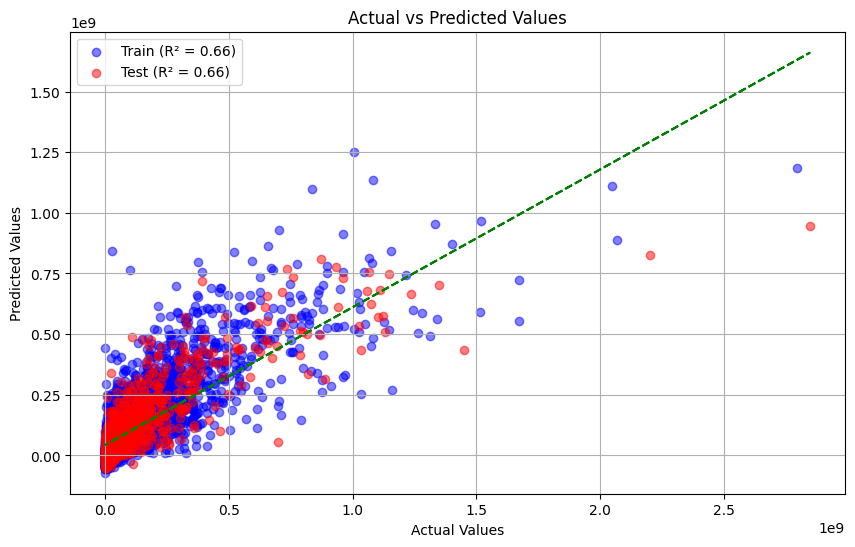

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# Hồi quy tuyến tính với gridsearch

In [ ]:
# @title Thêm một số thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np


In [ ]:
# Đọc bộ dữ liệu đã được qua khâu tiền xử lý
df = pd.read_csv('output.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Mã hóa các trường hạng mục về dạng số
le = LabelEncoder()
categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [ ]:
# @title Chuẩn hóa dữ liệu
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    df[feature] = le.fit_transform(np.reshape(df[feature], (-1, 1)))

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
features = df[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
# features = df[['budget']]
target = df['gross']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.2)

In [ ]:
# Thực hiện giảm số chiều thông qua PCA
#pca = PCA(n_components=8) # Chỉ dữ lại 8 chiều
#X_train= pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
X_train = X_train
X_test = X_test

In [ ]:
# @title Thêm GirdSearch
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best R^2 Score: 0.660036459742507


In [ ]:
# Huấn luyện mô hình
model = LinearRegression(**best_params)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Xem xét độ chính xác của kết quả dự đoán trên tập huấn luyện và thử nghiệm
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Final Training Accuracy: 66.14%
Final Test Accuracy: 65.27%
Train MAPE: 35.78%
Test MAPE: 11.65%
Train MAE: 58797186.50
Test MAE: 58357361.23
Train MSE: 11798457586494132.00
Test MSE: 12493908691690950.00
Train RMSE: 108620705.15
Test RMSE: 111776154.40


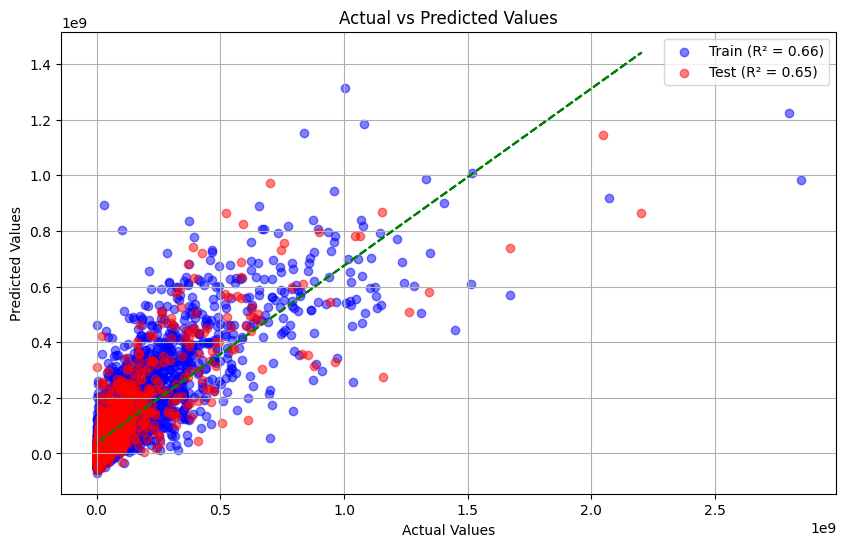

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# Hồi quy tuyến tính và PCA


Final Training Accuracy: 57.27%
Final Test Accuracy: 53.39%
Train MAPE: 47.87%
Test MAPE: 53.26%
Train MAE: 75930624.90
Test MAE: 78139298.33
Train MSE: 15129744633999164.00
Test MSE: 15724016217414498.00
Train RMSE: 123003026.93
Test RMSE: 125395439.38


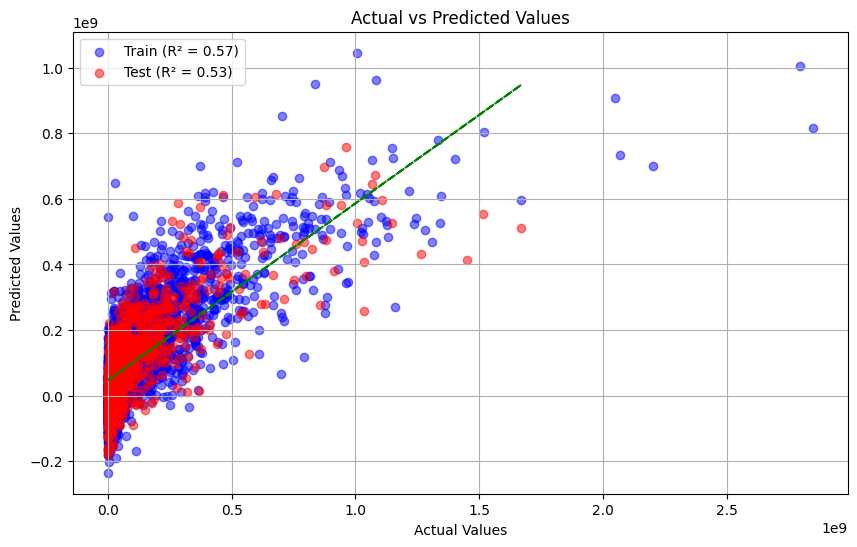

In [ ]:
# Thêm một số thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np


# Đọc bộ dữ liệu đã được qua khâu tiền xử lý
df = pd.read_csv('output.csv')

df.head()

# Mã hóa các trường hạng mục về dạng số
le = LabelEncoder()
categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Chuẩn hóa dữ liệu
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    df[feature] = le.fit_transform(np.reshape(df[feature], (-1, 1)))


features = df[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
# features = df[['budget']]
target = df['gross']

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.2)

#Thực hiện giảm số chiều thông qua PCA
pca = PCA(n_components=12) # Chỉ dữ lại 11 chiều
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = X_train
X_test = X_test

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Xem xét độ chính xác của kết quả dự đoán trên tập huấn luyện và thử nghiệm
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# Hồi quy KFold

      released    writer    rating      name     genre  director      star  \
1891  0.458755  1.255915 -1.206969  1.507932 -1.265519  1.186346 -0.328410   
75    0.698544  0.837242  0.776653  0.135871 -1.265519  0.762710  1.205022   
2138 -1.414016 -1.366758  0.776653 -1.263489  0.258840 -0.408519  0.683880   
2985 -0.528536  0.408807 -0.215158  1.466985 -1.265519 -0.023094  0.449554   
3653  0.539131  1.098642 -0.215158 -1.732109 -1.265519  1.053440 -1.305082   
...        ...       ...       ...       ...       ...       ...       ...   
3772  0.697205 -0.814673  0.776653  1.304495  1.021020  0.006810  0.970696   
5191  1.472837  0.735285 -2.198780 -0.154011  2.164289  0.661369  0.723247   
5226  1.152671 -1.007740  0.776653  0.975616 -1.265519 -0.812219 -1.130743   
5390 -0.785740 -0.748510 -0.215158 -0.421793  0.258840  1.462124  0.953824   
860   1.072295 -1.313610  0.776653  0.649338  2.164289 -0.347051  1.444972   

       country   company   runtime     score    budget      yea

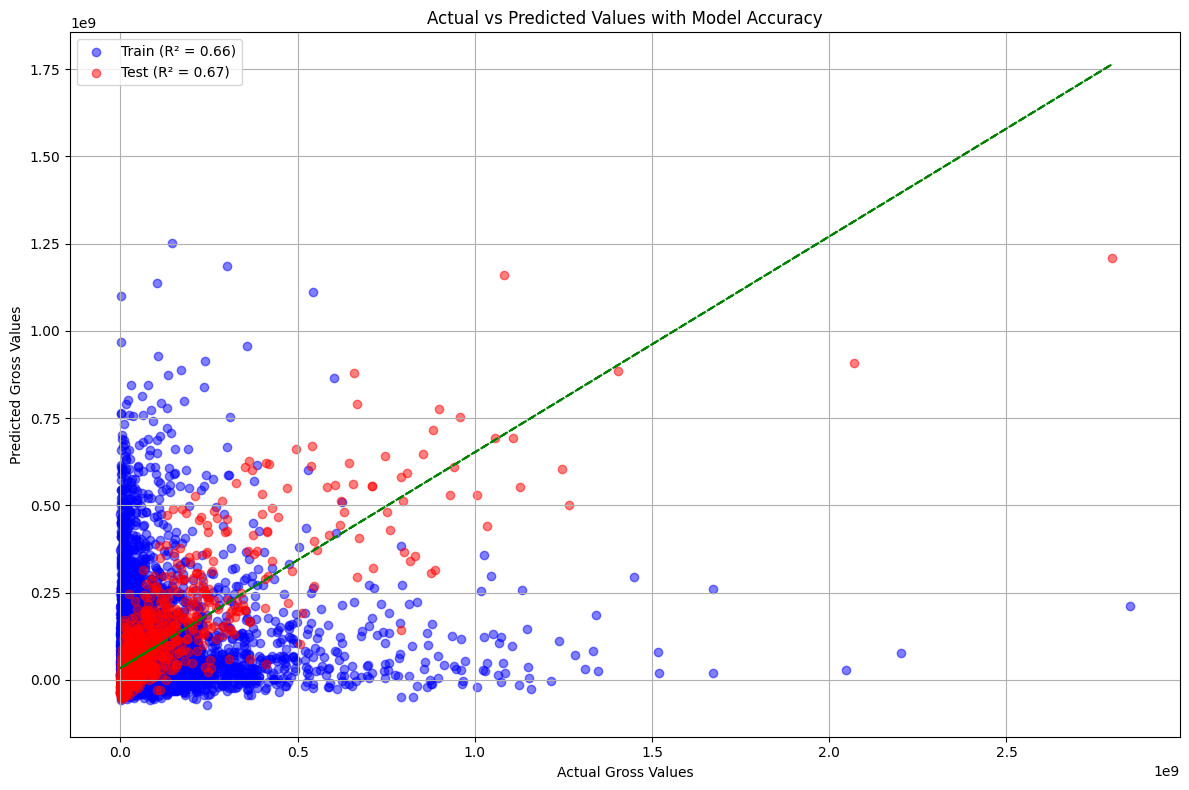

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score
import numpy as np

# Tải data
output = pd.read_csv('output.csv')

# Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    output[feature] = le.fit_transform(np.reshape(output[feature], (-1, 1)))

# Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

# Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

# Chia dữ liệu theo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lựa chọn mô hình
model = LinearRegression()

accuracies = []
MAPEs = []
MAEs = []
MSEs = []
RMSEs = []

for train, val in kf.split(X_train, y_train):
    # Huấn luyện mô hình
    model.fit(X_train.iloc[train], y_train.iloc[train])

    # Dự đoán dựa trên mô hình đã học
    # train_predictions = model.predict(X_train[train])
    val_predictions = model.predict(X_train.iloc[val])

    # Đánh giá
    # Tính R2 scores
    # train_accuracy = r2_score(y_train[train], train_predictions)
    val_accuracy = r2_score(y_train.iloc[val], val_predictions)

    # # Tính MAPE
    # train_mape = mean_absolute_percentage_error(y_train[train], train_predictions)
    val_mape = mean_absolute_percentage_error(y_train.iloc[val], val_predictions)

    # Tính MAE
    # train_mae = mean_absolute_error(y_train[train], train_predictions)
    val_mae = mean_absolute_error(y_train.iloc[val], val_predictions)

    # Tính MSE
    # train_mse = mean_squared_error(y_train[train], train_predictions)
    val_mse = mean_squared_error(y_train.iloc[val], val_predictions)

    # Tính RMSE
    # train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)

    accuracies.append(val_accuracy)
    MAPEs.append(val_mape)
    MAEs.append(val_mae)
    MSEs.append(val_mse)
    RMSEs.append(val_rmse)

# Dự đoán dựa trên mô hình đã học
test_predictions = model.predict(X_test)

# Đánh giá mô hình
# Tính R2 scores
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {np.mean(accuracies)*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {np.mean(MAPEs):.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {np.mean(MAEs):.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {np.mean(MSEs):.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Tính RMSE
test_rmse = np.sqrt(test_mse)

print(f'Train RMSE: {np.mean(RMSEs):.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Vẽ đồ thị
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

Nhận xét:
Kết quả huấn luyện cho ra bởi mô hình hồi quy tuyến tính không quá ấn tượng. Độ chính xác trên tập huấn luyện và trên tập thử nghiệm chỉ ở mức quanh trên 60%. Điều này có thể được lý giải bởi hai nguyên nhân


+ Thứ nhât mô hình hồi quy tuyến tính còn quá đơn giản và có thể chưa xấp xỉ được các mối quan hệ phi tuyến trong dữ liệu
+ Thứ hai doanh thu phim còn phụ thuộc vào yếu tố nội dung, tình tiết diễn ra trong phim. Yếu tố này chưa được biểu diễn trong bộ dữ liệu